In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [108]:
df=pd.read_csv('tsa_claims.csv')
df.head()

C:\Users\kevin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,04-Jan-02,12/12/2002 00:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,02-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,04-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,07-Feb-02,01/06/2003 00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2.00503E+12,18-Feb-02,02/05/2005 00:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204270 entries, 0 to 204269
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


In [109]:
df.drop('Airport Code',axis=1,inplace=True)

In [110]:
df['Claim Amount']

0         $350.00 
1         $100.00 
2         $278.88 
3          $50.00 
4          $84.79 
            ...   
204265           -
204266           -
204267           -
204268           -
204269           -
Name: Claim Amount, Length: 204270, dtype: object

In [111]:
# Mengubah tipe data menjadi float

In [112]:
# Menghapus tanda $
df['Claim Amount']=df['Claim Amount'].replace('[\$,]','', regex=True)

In [113]:
# Menghapus tanda ;
df['Claim Amount']=df['Claim Amount'].replace('[\;,]','',regex=True)

In [114]:
# Data yg berupa '-' diubah menjadi 0 ,karena sama dgn tidak dapat kompensasi
df['Claim Amount'][df['Claim Amount']=='-']=0

In [115]:
# Data yg berupa 'NaN' juga diubah menjadi 0
df['Claim Amount']=df['Claim Amount'].fillna(0)

In [116]:
df['Claim Amount']=df['Claim Amount'].astype(float)

In [117]:
df['Claim Amount']

0         350.00
1         100.00
2         278.88
3          50.00
4          84.79
           ...  
204265      0.00
204266      0.00
204267      0.00
204268      0.00
204269      0.00
Name: Claim Amount, Length: 204270, dtype: float64

In [118]:
df['Close Amount']

0         $350.00 
1          $50.00 
2         $227.92 
3          $50.00 
4          $84.79 
            ...   
204265         NaN
204266         NaN
204267         NaN
204268         NaN
204269         NaN
Name: Close Amount, Length: 204270, dtype: object

In [119]:
# Mengubah tipe data menjadi float

In [120]:
# Menghapus tanda $
df['Close Amount']=df['Close Amount'].replace('[\$,]','', regex=True)

In [121]:
# Menghapus tanda ;
df['Close Amount']=df['Close Amount'].replace('[\;,]','',regex=True)

In [122]:
# Data yg berupa '-' diubah menjadi 0 ,karena sama dgn tidak dapat kompensasi
df['Close Amount'][df['Close Amount']=='-']=0

C:\Users\kevin\AppData\Local\Temp/ipykernel_16960/355932824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close Amount'][df['Close Amount']=='-']=0


In [123]:
# Data yg berupa 'NaN' juga diubah menjadi 0
df['Close Amount']=df['Close Amount'].fillna(0)

In [124]:
df['Close Amount']=df['Close Amount'].astype(float)

In [125]:
df['Close Amount']

0         350.00
1          50.00
2         227.92
3          50.00
4          84.79
           ...  
204265      0.00
204266      0.00
204267      0.00
204268      0.00
204269      0.00
Name: Close Amount, Length: 204270, dtype: float64

In [126]:
df.describe()

,Claim Amount,Close Amount
count,2.042700e+05,204270.000000
mean,1.477271e+07,65.112711
std,6.637744e+09,754.965392
min,0.000000e+00,0.000000
25%,1.095000e+01,0.000000
50%,9.837000e+01,0.000000
75%,3.090000e+02,30.000000
max,3.000000e+12,250000.000000


In [127]:
df['Date Received'].head()

0    04-Jan-02
1    02-Feb-02
2    04-Feb-02
3    07-Feb-02
4    18-Feb-02
Name: Date Received, dtype: object

In [128]:
# Mengubah bentuk data menjadi datetime

In [129]:
df['Date Received']=pd.to_datetime(df['Date Received'])

In [130]:
df['Date Received'].head()

0   2002-01-04
1   2002-02-02
2   2002-02-04
3   2002-02-07
4   2002-02-18
Name: Date Received, dtype: datetime64[ns]

In [131]:
df['Incident Date'].head()

0    12/12/2002 00:00
1      1/16/2004 0:00
2     11/26/2003 0:00
3    01/06/2003 00:00
4    02/05/2005 00:00
Name: Incident Date, dtype: object

In [132]:
# Mengubah bentuk data menjadi datetime

In [133]:
# Coerce untuk data datetime yg outside range agar dilangkahi
df['Incident Date']=pd.to_datetime(df['Incident Date'],errors = 'coerce')

In [134]:
df['Incident Date'].head()

0   2002-12-12
1   2004-01-16
2   2003-11-26
3   2003-01-06
4   2005-02-05
Name: Incident Date, dtype: datetime64[ns]

In [135]:
# Banyak claims yg Approve dari seluruh data
df['Disposition'][df['Disposition']=='Approve in Full'].count()

35010

In [136]:
# Banyak claims yg Settle dari seluruh data
df['Disposition'][df['Disposition']=='Settle'].count()

27967

In [137]:
# Banyak claims yg Deny dari seluruh data
df['Disposition'][df['Disposition']=='Deny'].count()

68382

In [139]:
# Jumlah claims yg telah diselesaikan
35010+27967+68382

131359

In [140]:
# Persentase Approve
35010/131359*100

26.652151736843305

In [141]:
# Persentase Settle
27967/131359*100

21.290509215204136

In [142]:
# Persentase Deny
68382/131359*100

52.05733904795255

In [143]:
# Jenis barang yg paling sering hilang
df.groupby('Item').count().sort_values('Claim Number',ascending=False).head()

,Claim Number,Date Received,Incident Date,Airport Name,Airline Name,Claim Type,Claim Site,Claim Amount,Status,Close Amount,Disposition
Item,,,,,,,,,,,
Other,36908,36886,36357,34464,27684,34659,36807,36908,36908,36908,27279
Luggage (all types including footlockers),19128,19103,18622,17462,13317,18043,19065,19128,19128,19128,17490
Clothing - Shoes; belts; accessories; etc.,14937,14919,14663,13905,10974,13869,14891,14937,14937,14937,13510
Jewelry - Fine,9902,9892,9779,9368,7473,9191,9871,9902,9902,9902,8615
Locks,9570,9563,9418,9082,7572,9214,9554,9570,9570,9570,8999


In [36]:
# Mengelompokan berdasarkan airport

In [144]:
df_airport=df.groupby('Airport Name')

In [145]:
df_airport['Claim Number'].count().sort_values(ascending=False).head(10)

Airport Name
John F. Kennedy International                       9232
Los Angeles International Airport                   7260
Newark International Airport                        6866
Chicago O'Hare International Airport                6843
Miami International Airport                         6432
Orlando International Airport                       6394
Hartsfield-Jackson Atlanta International Airport    5871
Seattle-Tacoma International                        5396
Phoenix Sky Harbor International                    5086
McCarran International                              5058
Name: Claim Number, dtype: int64

In [45]:
df_airport.mean().sort_values('Close Amount',ascending=False).head(10)

,Claim Amount,Close Amount
Airport Name,,
Charlottesville / Albemarle,2320.000000,1987.215000
Tri-State; Huntington,3177.700000,1647.870000
Guam,1387.040000,874.750000
Southwest Georgia Regional Airport ;Albany,835.950000,835.950000
William P. Hobby,3314.900417,734.599881
Gainesville Regional,715.000000,702.000000
McCarran International,1015.660329,626.030136
Midland International Airport,826.137500,575.887500
Hector International,640.000000,552.500000


In [158]:
# Banyak claim per airport
df_avgairp=df[['Claim Number','Airport Name']].groupby('Airport Name').count()

In [159]:
# Aiport dengan jumlah claim terbanyak
df_avgairp.sort_values('Claim Number',ascending=False).head(10)

,Claim Number
Airport Name,
John F. Kennedy International,9232
Los Angeles International Airport,7260
Newark International Airport,6866
Chicago O'Hare International Airport,6843
Miami International Airport,6432
Orlando International Airport,6394
Hartsfield-Jackson Atlanta International Airport,5871
Seattle-Tacoma International,5396
Phoenix Sky Harbor International,5086


In [160]:
# Rata-rata klaim per airport
df_avgairp.mean()

Claim Number    403.593814
dtype: float64

In [41]:
# Mengelompokan berdasarkan airline

In [42]:
df_airline=df.groupby('Airline Name')

In [157]:
df_airline['Claim Number'].count().sort_values(ascending=False).head(10)

Airline Name
American Airlines       2730
Delta Air Lines         2452
UAL                     2070
Northwest Airlines      1587
Southwest Airlines      1513
USAir                   1409
Continental Airlines    1111
Alaska Airlines          686
America West             454
Jet Blue                 351
Name: Claim Number, dtype: int64

In [46]:
df_airline.mean().sort_values('Close Amount',ascending=False).head(30)

,Claim Amount,Close Amount
Airline Name,,
ATA Aerocondor,2950.000000,1403.640000
Aero Flot,2139.500000,1365.000000
Lan Airlines,1625.000000,1100.000000
Aer Lingus,1070.000000,1042.798333
Horizon Air,2147.486923,562.863077
Korean Airlines,460.250000,373.500000
Southwest Airlines,790.494772,293.853721
Singapore Airlines,468.723750,289.500000
KLM Royal Dutch Airlines,359.902857,237.744286


In [163]:
# Banyak claim per airline
df_avgairl=df[['Claim Number','Airline Name']].groupby('Airline Name').count()

In [164]:
# Airline dengan jumlah claim terbanyak
df_avgairl.sort_values('Claim Number',ascending=False).head(10)

,Claim Number
Airline Name,
American Airlines,17553
Delta Air Lines,17223
UAL,13993
Southwest Airlines,13162
Continental Airlines,9674
USAir,9621
Northwest Airlines,9215
Delta Air Lines,8365
Southwest Airlines,7378


In [165]:
# Rata-rata klaim per airline
df_avgairl.mean()

Claim Number    534.254717
dtype: float64

In [146]:
df_luggage=df[df['Item']=='Luggage (all types including footlockers)']

In [147]:
df_luggage.groupby(['Airline Name','Item']).mean().sort_values('Close Amount',ascending=False).head(30)

,,Claim Amount,Close Amount
Airline Name,Item,,
Iceland Air,Luggage (all types including footlockers),959.075714,886.072857
Swiss Air,Luggage (all types including footlockers),508.850000,298.457778
Estonia Air,Luggage (all types including footlockers),219.950000,186.960000
All Nippon Airways,Luggage (all types including footlockers),150.000000,150.000000
Champion Airlines,Luggage (all types including footlockers),284.860000,142.430000
Lan Airlines,Luggage (all types including footlockers),220.882500,132.135000
Aer Lingus,Luggage (all types including footlockers),141.000000,116.000000
Island Airlines Nantucket,Luggage (all types including footlockers),109.730000,109.730000
Korean Airlines,Luggage (all types including footlockers),728.409000,108.380500


In [106]:
# Jumlah klaim untuk Luggage per Airline
df_luggage[['Claim Number','Airline Name','Item']].groupby(['Airline Name','Item']).count().sort_values('Claim Number',ascending=False).head(20)

,,Claim Number
Airline Name,Item,
American Airlines,Luggage (all types including footlockers),505
Delta Air Lines,Luggage (all types including footlockers),493
UAL,Luggage (all types including footlockers),449
Northwest Airlines,Luggage (all types including footlockers),342
USAir,Luggage (all types including footlockers),300
Southwest Airlines,Luggage (all types including footlockers),261
Continental Airlines,Luggage (all types including footlockers),172
Alaska Airlines,Luggage (all types including footlockers),107
America West,Luggage (all types including footlockers),88


In [148]:
# Jumlah klaim untuk Luggage per Airport
df_luggage[['Claim Number','Airport Name','Item']].groupby(['Airport Name','Item']).count().sort_values('Claim Number',ascending=False).head(20)

,,Claim Number
Airport Name,Item,
Chicago O'Hare International Airport,Luggage (all types including footlockers),889
Los Angeles International Airport,Luggage (all types including footlockers),858
Newark International Airport,Luggage (all types including footlockers),671
Miami International Airport,Luggage (all types including footlockers),608
John F. Kennedy International,Luggage (all types including footlockers),558
Washington Dulles International,Luggage (all types including footlockers),496
Phoenix Sky Harbor International,Luggage (all types including footlockers),481
Philadelphia International Airport,Luggage (all types including footlockers),455
Seattle-Tacoma International,Luggage (all types including footlockers),443


In [75]:
df_luggage.groupby(['Airport Name','Item']).mean().sort_values('Close Amount',ascending=False).head(10)

,,Claim Amount,Close Amount
Airport Name,Item,,
Hector International,Luggage (all types including footlockers),640.000000,552.500000
Will Rogers World,Luggage (all types including footlockers),646.998333,416.166667
Cherry Capital Airport,Luggage (all types including footlockers),622.500000,332.500000
Norfolk International,Luggage (all types including footlockers),350.055455,307.362727
Memphis International Airport,Luggage (all types including footlockers),621.890000,205.500000
Meadows Field; Bakersfield Airport,Luggage (all types including footlockers),180.000000,162.000000
Corpus Christi International,Luggage (all types including footlockers),140.670000,140.670000
Mobile Regional,Luggage (all types including footlockers),140.000000,140.000000
San Antonio International,Luggage (all types including footlockers),311.000833,136.060417


In [74]:
df_luggage[df_luggage['Airport Name']=='Los Angeles International Airport'].mean().sort_values(ascending=False)

C:\Users\kevin\AppData\Local\Temp/ipykernel_16960/2802618338.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_luggage[df_luggage['Airport Name']=='Los Angeles International Airport'].mean().sort_values(ascending=False)
C:\Users\kevin\AppData\Local\Temp/ipykernel_16960/2802618338.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_luggage[df_luggage['Airport Name']=='Los Angeles International Airport'].mean().sort_values(ascending=False)


Claim Amount    230.127679
Close Amount     77.974196
dtype: float64

In [76]:
df_luggage[df_luggage['Airport Name']=='Newark International Airport'].mean().sort_values(ascending=False)

C:\Users\kevin\AppData\Local\Temp/ipykernel_16960/3736241723.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_luggage[df_luggage['Airport Name']=='Newark International Airport'].mean().sort_values(ascending=False)
C:\Users\kevin\AppData\Local\Temp/ipykernel_16960/3736241723.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_luggage[df_luggage['Airport Name']=='Newark International Airport'].mean().sort_values(ascending=False)


Claim Amount    388.171759
Close Amount     66.524259
dtype: float64

In [78]:
df_luggage[df_luggage['Airport Name']=='Chicago O\'Hare International Airport'].mean().sort_values(ascending=False)

C:\Users\kevin\AppData\Local\Temp/ipykernel_16960/1929304888.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_luggage[df_luggage['Airport Name']=='Chicago O\'Hare International Airport'].mean().sort_values(ascending=False)
C:\Users\kevin\AppData\Local\Temp/ipykernel_16960/1929304888.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_luggage[df_luggage['Airport Name']=='Chicago O\'Hare International Airport'].mean().sort_values(ascending=False)


Claim Amount    4672.607488
Close Amount      77.636355
dtype: float64

In [152]:
# Mencari jenis barang kecuali 'Other'
df_nother=df[df['Item']!='Other']

In [154]:
# Jenis barang paling banyak di tiap airport
df_nother.groupby(['Airport Name','Item']).count().sort_values('Claim Number',ascending=False).head()

Claim Number  \
Airport Name                         Item                                                      
Chicago O'Hare International Airport Luggage (all types including footlockers)           889   
Los Angeles International Airport    Luggage (all types including footlockers)           858   
Newark International Airport         Luggage (all types including footlockers)           671   
Los Angeles International Airport    Computer - Laptop                                   641   
                                     Cameras - Digital                                   627   

                                                                                Date Received  \
Airport Name                         Item                                                       
Chicago O'Hare International Airport Luggage (all types including footlockers)            889   
Los Angeles International Airport    Luggage (all types including footlockers)            856   
Newark International Airport         Luggage (all types including footlockers)            671   
Los Angeles International Airport    Computer - Laptop                                    640   
                                     Cameras - Digital                                    627   

                                                                                Incident Date  \
Airport Name                         Item                                                       
Chicago O'Hare International Airport Luggage (all types including footlockers)            881   
Los Angeles International Airport    Luggage (all types including footlockers)            847   
Newark International Airport         Luggage (all types including footlockers)            665   
Los Angeles International Airport    Computer - Laptop                                    640   
                                     Cameras - Digital                                    622   

                                                                                Airline Name  \
Airport Name                         Item                                                      
Chicago O'Hare International Airport Luggage (all types including footlockers)           689   
Los Angeles International Airport    Luggage (all types including footlockers)           538   
Newark International Airport         Luggage (all types including footlockers)           528   
Los Angeles International Airport    Computer - Laptop                                   489   
                                     Cameras - Digital                                   492   

                                                                                Claim Type  \
Airport Name                         Item                                                    
Chicago O'Hare International Airport Luggage (all types including footlockers)         864   
Los Angeles International Airport    Luggage (all types including footlockers)         810   
Newark International Airport         Luggage (all types including footlockers)         643   
Los Angeles International Airport    Computer - Laptop                                 623   
                                     Cameras - Digital                                 593   

                                                                                Claim Site  \
Airport Name                         Item                                                    
Chicago O'Hare International Airport Luggage (all types including footlockers)         889   
Los Angeles International Airport    Luggage (all types including footlockers)         854   
Newark International Airport         Luggage (all types including footlockers)         669   
Los Angeles International Airport    Computer - Laptop                                 640   
                                     Cameras - Digital                                 627   

                                                        

In [155]:
# Jenis barang paling banyak di tiap airline
df_nother.groupby(['Airline Name','Item']).count().sort_values('Claim Number',ascending=False).head()

,,Claim Number,Date Received,Incident Date,Airport Name,Claim Type,Claim Site,Claim Amount,Status,Close Amount,Disposition
Airline Name,Item,,,,,,,,,,
American Airlines,Luggage (all types including footlockers),2088,2085,2070,2026,2009,2084,2088,2088,2088,1979
Delta Air Lines,Luggage (all types including footlockers),1949,1948,1932,1880,1876,1946,1949,1949,1949,1829
UAL,Luggage (all types including footlockers),1800,1799,1791,1737,1726,1799,1800,1800,1800,1686
Delta Air Lines,Clothing - Shoes; belts; accessories; etc.,1608,1606,1601,1564,1520,1605,1608,1608,1608,1493
American Airlines,Clothing - Shoes; belts; accessories; etc.,1532,1530,1522,1486,1458,1530,1532,1532,1532,1426


In [173]:
# Mencari perbandingan claim amount dan close amount pada luggage
df[df['Item']=='Luggage (all types including footlockers)'].mean()

C:\Users\kevin\AppData\Local\Temp/ipykernel_16960/839188808.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[df['Item']=='Luggage (all types including footlockers)'].mean()
C:\Users\kevin\AppData\Local\Temp/ipykernel_16960/839188808.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Item']=='Luggage (all types including footlockers)'].mean()


Claim Amount    353.471954
Close Amount     44.750709
dtype: float64

In [167]:
df_item=df.groupby('Item')

In [168]:
# Mencari jenis item dengan refund tertinggi
df_item.mean().sort_values('Close Amount',ascending=False)

,Claim Amount,Close Amount
Item,,
Locks; Tool Chests & Tool Boxes (not in a vehicle)_ ; Tools - Manual (not in a vehicle),2308.50,2308.50
Sporting Equipment & Supplies (footballs; parachutes; etc.); Sporting Equipment & Supplies (footballs; parachutes; etc.); Sporting Equipment & Supplies (footballs; parachutes; etc.); Sporting Equipment & Supplies (footballs; parachutes; etc.); Sporting Equipment & Supplies (footballs; parachutes; etc.),2409.96,2168.96
Handbags & Purses (leather or fabric); Jewelry - Costume; Jewelry - Fine; Watches - Inexpensive $100 or less,2102.99,2102.99
Cameras - Digital; Jewelry - Fine; Other; Watches - Expensive more than $100,5000.00,2039.83
Binoculars; Cameras - Digital; Electrical and Gas Appliances Minor - $200 or less (humidifiers; tv's; etc),2223.96,1986.98
...,...,...
Cameras - Digital; Clothing - Shoes; belts; accessories; etc.; Eyeglasses - (including contact lenses); Other,504.65,0.00
Cameras - Digital; Clothing - Shoes; belts; accessories; etc.; Eyeglasses - (including contact lenses); PDA - Personal Data Assistants,3500.00,0.00
Cameras - Digital; Clothing - Shoes; belts; accessories; etc.; GPS - Global Positioning System,792.95,0.00


In [149]:
df.corr('spearman')

,Claim Amount,Close Amount
Claim Amount,1.000000,0.205996
Close Amount,0.205996,1.000000


In [150]:
# Mencari korelasi Claim Amount dan Close Amount
# Karena kurang dari 0.3 maka relasi lemah

In [179]:
df_date=df[df['Date Received']<pd.Timestamp(2021,12,31)].groupby('Date Received').count()

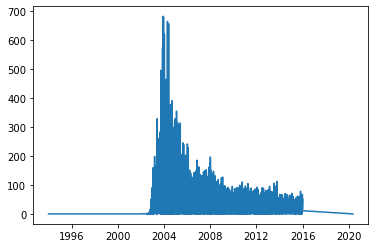

In [183]:
plt.plot(df_date['Claim Number'])
plt.show()

In [182]:
# Pada grafik di atas tahun yg memiliki jumlah claim terbanyak adalah 2004.
# Setelah itu jumlah claim barang hilang mulai berkurang